### Credit card fraud detection
In this project we will attempt to fit several machine learning models on skewed data. The data is highly imbalanced.
We would like to invesitgate which of the methods below work best with unbalanced data.
* Auto Machine Learning
* Logistic Regression
* SVMs
* Decision trees
* anomaly detection


In [1]:
import sklearn
import scipy as sci
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import statsmodels
import bokeh
import sympy
import requests
import blaze
import seaborn as sns
sns.set(color_codes=True)
#from auto_ml import Predictor
#from auto_ml.utils_models import load_ml_model

# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

#import warnings

#def fxn():
#    warnings.warn("deprecated", DeprecationWarning)

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")
#    fxn()


/Users/nanaakwasiabayieboateng/anaconda/lib/python3.5/site-packages/odo/backends/pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [2]:
creditcard=pd.read_csv("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/H20/creditcard.csv")
creditcard.head()

hrdata=pd.read_excel("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/WA_Fn-UseC_-HR-Employee-Attrition.xlsx")
bankdata2=pd.DataFrame.from_csv("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/Anomalydetection/bank/bank-full.csv", sep=';')

bankdata2.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
hrdata.head()





,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
hrdata.describe()




,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
hrdata['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

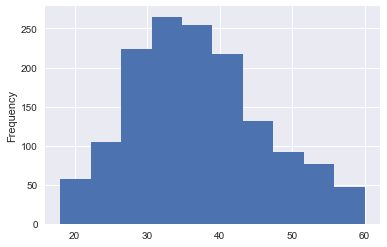

In [5]:
#%matplotlib inline
hrdata['Age'].plot(kind="hist")

plt.show()

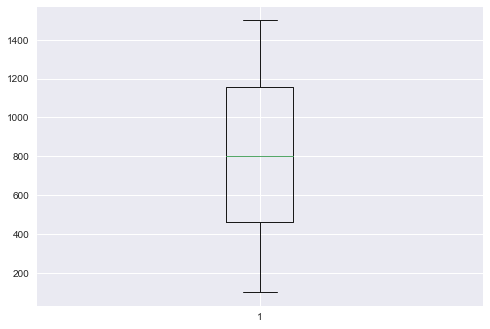

In [48]:
plt.boxplot(hrdata['DailyRate'])
# suppresses message
plt.show()

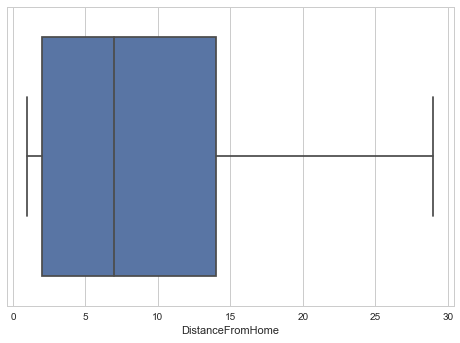

In [50]:

sns.set_style("whitegrid")
ax = sns.boxplot(x=hrdata['DistanceFromHome'])

In [51]:
hrdata.shape

(1470, 35)

%matplotlib inline
creditcard['Class'].plot(kind="hist")
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [ ]:
x=creditcard['Class']
sns.distplot(x, kde=False, rug=True)

In [ ]:
count_classes = pd.value_counts(creditcard['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### Split dataframe into training set and test set

In [3]:


from sklearn.model_selection import train_test_split

train, test = train_test_split(hrdata, test_size=0.3)

In [4]:
train.shape

(1029, 35)

In [5]:
test.shape

(441, 35)

#### Alternatively

In [9]:
#split dataframe into train and test, 70% and 30% respectively

index = np.random.rand(len(hrdata)) < 0.7

train2 = hrdata[index]

test = hrdata[~index]

In [77]:
train2.shape

(1003, 35)

#### Another way

In [78]:
train3, validate, test3 = np.split(hrdata.sample(frac=1), [int(.6*len(hrdata)), int(.8*len(hrdata))])


In [74]:
train3.shape


(882, 35)

In [70]:
validate.shape


(294, 35)

In [79]:
test3.shape

(294, 35)

#### create labels from split data

In [10]:
train_label=train['Attrition']

In [11]:
test_label=test['Attrition']

In [12]:
X_train=train.loc[:, train.columns != 'Attrition']

In [13]:
X_test=test.loc[:, test.columns != 'Attrition']

#### Alternatively

In [ ]:
train.drop('Attrition', axis=1).head()


X = train.drop('Attrition', axis=1)
y = train.drop.loc[:, 'Attrition'] 
X

#### Autosklearn
auto-sklearn is an automated machine learning toolkit and a drop-in replacement for a scikit-learn estimator:

In [ ]:
import pandas as pd  
from sklearn.cross_validation import train_test_split  
from tpot import TPOTClassifier  
 
    
pipeline_optimizer = TPOTClassifier()
    

#hill_valley_noisy_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_with_noise.csv.gz', sep='\t', compression='gzip')  
  
X = hrdata.drop('class', axis=1).values  
y = hrdata.loc[:, 'class'].values  
  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.75,  
                                                    test_size=0.25)  
  
my_tpot = TPOTClassifier(generations=10)  
my_tpot.fit(X_train, y_train)  
  
print(my_tpot.score(X_test, y_test)) 





#X = dataset.drop('class', axis=1)
#Y = dataset['class'] 
#seed =148
#validation_size = 0.20

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#X_train.head()
#X_validation.head(5)

#np.unique(Y)

#Y.value_counts()


hrdata.head()

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)


pipeline_optimizer.fit(X_train, train_label)

print(pipeline_optimizer.score(X_test, test_label))

Finally, you can tell TPOT to export the corresponding Python code for the optimized pipeline to a text file with the export function:



In [ ]:
pipeline_optimizer.export('/Users/nanaakwasiabayieboateng/PythonMachineLearning/tpot_exported_pipeline.py')

In [ ]:
hrdata.head()

In [ ]:
import autosklearn.classification
import sklearn.cross_validation
import sklearn.datasets
import sklearn.metrics

digits = sklearn.datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, random_state=1)

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cross_validation import cross_val_score  
  
mnist_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/mnist.csv.gz', sep='\t', compression='gzip')  
  
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=10, n_jobs=-1),  
                            X=mnist_data.drop('class', axis=1).values,  
                            y=mnist_data.loc[:, 'class'].values,  
                            cv=10)  
  
print(cv_scores) 

print(np.mean(cv_scores))  


cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),  
                            X=mnist_data.drop('class', axis=1).values,  
                            y=mnist_data.loc[:, 'class'].values,  
                            cv=10)  
  
print(cv_scores) 

print(np.mean(cv_scores))

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.cross_validation import cross_val_score  
  
hill_valley_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_without_noise.csv.gz', sep='\t', compression='gzip')  
  
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),  
                            X=hill_valley_data.drop('class', axis=1).values,  
                            y=hill_valley_data.loc[:, 'class'].values,  
                            cv=10)  
  
print(cv_scores)  

print(np.mean(cv_scores)) 

cv_scores = cross_val_score(LogisticRegression(),  
                            X=hill_valley_data.drop('class', axis=1).values,  
                            y=hill_valley_data.loc[:, 'class'].values,  
                            cv=10)  
  
print(cv_scores) 

print(np.mean(cv_scores)) 

In [ ]:
import pandas as pd  
from sklearn.cross_validation import train_test_split  
from tpot import TPOTClassifier  
  
hill_valley_noisy_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_with_noise.csv.gz', sep='\t', compression='gzip')  
  
X = hill_valley_noisy_data.drop('class', axis=1).values  
y = hill_valley_noisy_data.loc[:, 'class'].values  
  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.75,  
                                                    test_size=0.25)  
  
my_tpot = TPOTClassifier(generations=10)  
my_tpot.fit(X_train, y_train)  
  
print(my_tpot.score(X_test, y_test))  

#### AML  in TPOT package

We will have a look at some very basic examples in the TPOT package. The most basic example is assigning and fitting a simple classifier or regressor in TPOT.

In [ ]:
from tpot import TPOTClassifier, TPOTRegressor
 
# create instance 
tpot = TPOTClassifier()
# fit instance
tpot.fit(X_train, y_train)
 
# create instance
tpot = TPOTRegressor()
# fit instance
tpot.fit(X_train, y_train)
 
# evaluate performance on test data
tpot.score(X_test, y_test)
 
# export the script used to create the best model
tpot.export('tpot_exported_pipeline.py')